In [31]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.constants import gravitational_constant, au
mass_sun = 1.989e30
year = 365.25*24*3600
mars_distance = 227.9*1.e9
jupiter_distance = 778.57*1.e9
# All units in SI

In [32]:
gee_msol = gravitational_constant*mass_sun
scale_factor = (gee_msol/au/au/au) * year * year
r_mars = mars_distance/au
r_jup = jupiter_distance/au

In [22]:
def fgrav(vec, t):
    x, y, vx, vy = vec
    r = np.sqrt(x*x + y*y)
    acc = scale_factor/r/r
    return (vx, vy, -acc*x/r, -acc*y/r)

## Orbital Mechanics

This notebook is about having some fun with orbital mechanics. We'll calculate the orbits of Earth and Mars, then try launching some spacecraft from near Earth and see what happens.

In [33]:
times = np.linspace(0., 4., 1000) # 4 years; adjust as desired, also change number of points if you want

In [37]:
vec_init1 = (1., 0., 0., np.sqrt(scale_factor)) # Starting values at t = 0
vec_earth = odeint(fgrav, vec_init1, times)

In [38]:
vec_init2 = (r_mars, 0., 0., np.sqrt(scale_factor/r_mars)) # Starting values at t = 0
vec_mars = odeint(fgrav, vec_init2, times)

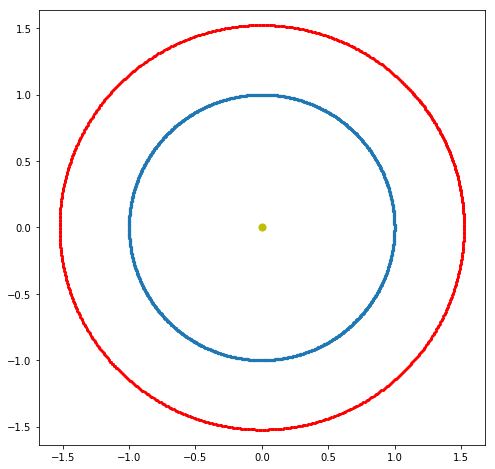

In [39]:
plt.figure(figsize=(8,8))
plt.scatter(vec_earth[:,0], vec_earth[:,1], s=5)
plt.scatter(vec_mars[:,0], vec_mars[:,1], c='r', s=4)
plt.scatter(0., 0., c='y', s=50)
plt.gca().set_aspect('equal', 'datalim')

## Hohmann Transfer Orbit

A Hohmann transfer orbit is the minimum-energy way to go from one circular orbit to another in the same plane. It's an elliptical orbit that just barely touches both circular orbits. You can read about it on [Wikipedia](https://en.wikipedia.org/wiki/Hohmann_transfer_orbit).

For the initial conditions, we can start it at the same position as Earth at $t = 0$, i.e. $(x, y) = (1, 0)$. But we need to choose the correct velocity to reach Mars's orbit. We could write down the energy equation and solve it, or we could let the computer solve it.

In [ ]:
vec_init3 = (r_mars, 0., 0., np.sqrt(scale_factor/r_mars)) # Starting values at t = 0
vec_craft = odeint(fgrav, vec_init3, times)

**Step 1**: Write a function that takes the output of `odeint` and gives an array of the distance from the Sun.

**Step 2**: Now write a function that finds the maximum radius of the craft.

**Step 3**: Now put it together. Write a function that takes an initial velocity, solves the ODE, then finds the maximum radius that the orbit of the craft reaches. Test the function and make sure it gives sensible results (e.g. what happens when it has the same velocity as the Earth?).

**Step 4**: Using `fsolve`, you can find the root of a function. You need to give it a function that returns zero when it's at the right answer, so it's good to have it return the square of the max distance minus the distance that you want it to reach (`r_mars`).

In [42]:
from scipy.optimize import fsolve
fsolve?

In [41]:
def test(x):
    return (x - 2.)**2

fsolve(test, 1.)

array([ 2.])

**Challenge**: How long does the spacecraft take to get to Mars? At what angle around the Sun does it finish, relative to where it began?

**Even more challenging**: How far apart in times are the launch windows? At what time in our simulation should the spacecraft be launched?

## Other fun things to try

Once you've finished above, go ahead and try whichever of these appeal to you.

 * What if gravity were an inverse cube rather than an inverse square law? What do the orbits look like, are they stable? This is what would happen if there were three space dimensions.
 * Simulate a solar sail mission, see the hints below.
 * Add in Jupiter, travel there.
 * Add in the force from a rocket. See the hints below.

## Inverse Cube Law

Just replace $\frac{1}{r^2}$ with $\frac{1}{r^3}$. You can also add in a little bit of a $\frac{1}{r^3}$ term to the one currently there. This actually happens due to the oblateness of the Sun and also General Relativity, and we measure these effects on Mercury. You need an elliptical orbit to see them though.

## Solar sail

The intensity of sunlight at Earth's orbit is 1400 Watts per square meter. That falls off like $1/r^2$. The pressure of light is intensity divided by the speed of light.

To get the acceleration provided by a solar sail, multiply the pressure of the sunlight by the area of your solar sail, and divide by the mass of your craft. It's not like gravity, the mass of your craft doesn't divide out. You might have a tiny probe of a few kilograms, or maybe a metric ton like a more typical craft.

The force of the sunlight points directly out from the Sun, so in the opposite direction from gravity.

In [43]:
from scipy.constants import speed_of_light

## Rocket

To make the rocket interesting, let's always point it at a 90 degree angle from the sun. We need a unit vector that's perpendicular to $\hat{r~}$. We can use the cross product with $z$.

$$\hat{\theta~} = \left( \frac{x}{r}, \frac{y}{r}, 0 \right) \times \left( 0, 0, 1 \right)$$

You can make it a constant force or whatever you want. A real rocket would lose mass as it expends its fuel, if you want to simulate that.